# Jonathan Halverson
# Wednesday, March 15, 2017
# Part 4b: Age, reach and height per division and per year

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [87]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [88]:
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
fighters.head(3)

,Name,Nickname,Dob,Weight,Height,Reach,LegReach,Stance,Win,Loss,Draw
0,Tom Aaron,NaN,1978-07-13,155.0,NaN,NaN,NaN,NaN,5.0,3.0,0.0
1,Danny Abbadi,The Assassin,1983-07-03,155.0,71.0,NaN,NaN,Orthodox,4.0,6.0,0.0
2,David Abbott,Tank,NaT,265.0,72.0,NaN,NaN,Switch,10.0,14.0,0.0


In [89]:
cols = ['Name', 'Weight', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df.shape

(4068, 18)

In [90]:
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df.shape

(4068, 25)

In [91]:
df = df.drop(['Name', 'Name_L'], axis=1)

In [92]:
df['Age'] = (df.Date - df.Dob) / np.timedelta64(1, 'Y')
df['Age_L'] = (df.Date - df.Dob_L) / np.timedelta64(1, 'Y')

In [93]:
wc = ["Women's Strawweight", "Women's Bantamweight", 'Flyweight', 'Bantamweight', 'Featherweight',
      'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']
years = range(1993, 2017)
for w in wc:
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')
     exec('num_fights_' + w_class + ' = []')
     exec('age_' + w_class + ' = []')
     exec('height_' + w_class + ' = []')
     exec('reach_' + w_class + ' = []')
     for year in years:
          recs = df[(df.WeightClass == w) & (df.Date.dt.year == year)]
          exec('num_fights_' + w_class + '.append(recs.shape[0])')
          exec('age_' + w_class + '.append(recs.Age.append(recs.Age_L).mean())')
          exec('height_' + w_class + '.append(recs.Height.append(recs.Height_L).mean())')
          exec('reach_' + w_class + '.append(recs.Reach.append(recs.Reach_L).mean())')
     exec('num_fights_' + w_class + '= np.array(num_fights_' + w_class + ', dtype=np.float)')
     exec('num_fights_' + w_class + '[num_fights_' + w_class + '==0] = np.nan')

Now create the plots:

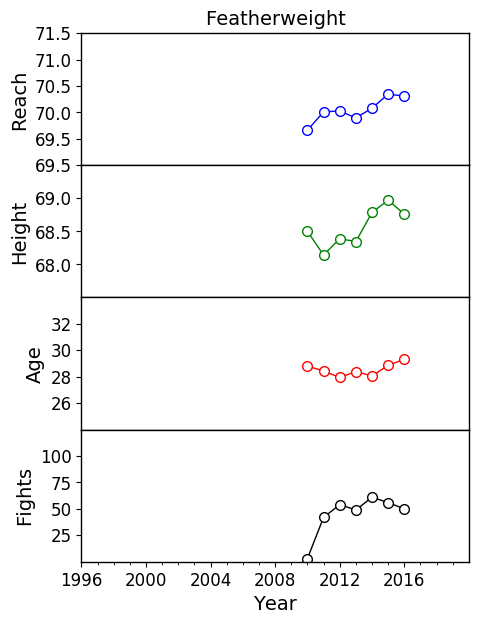

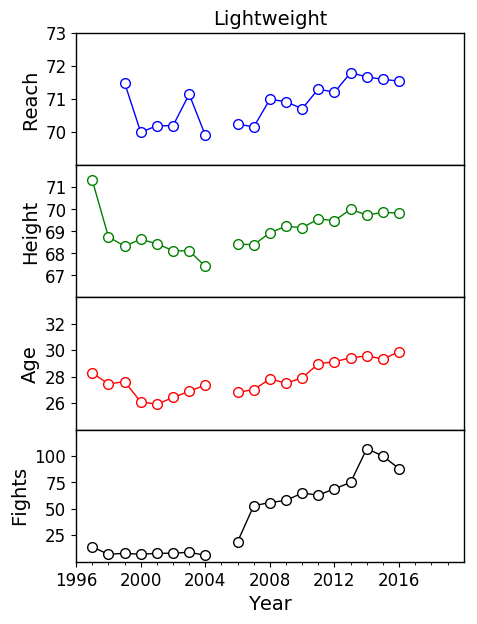

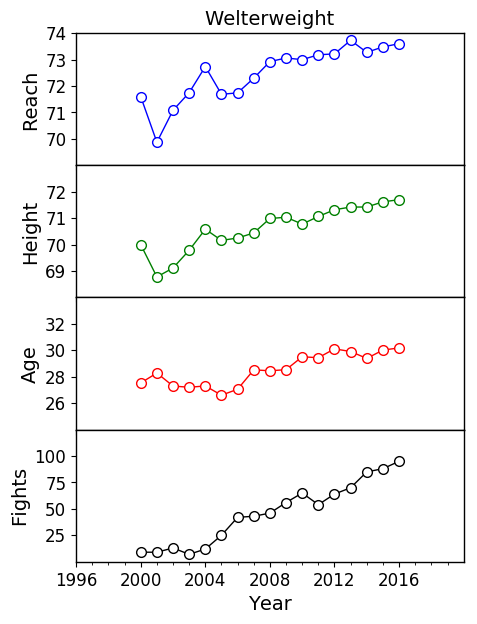

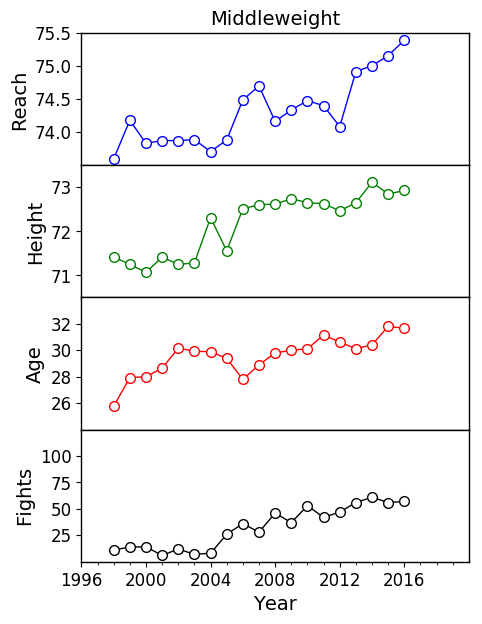

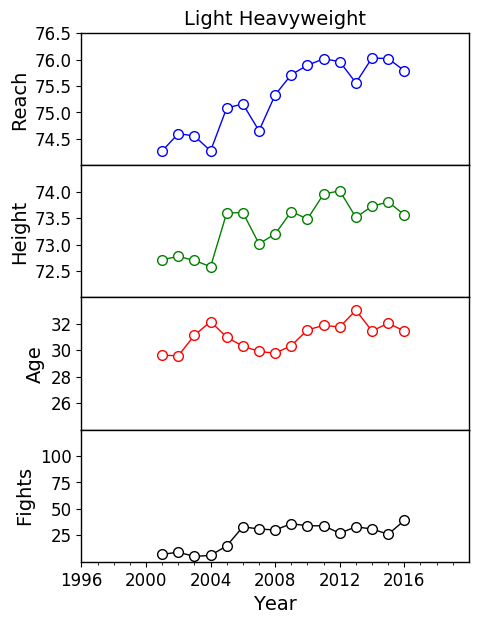

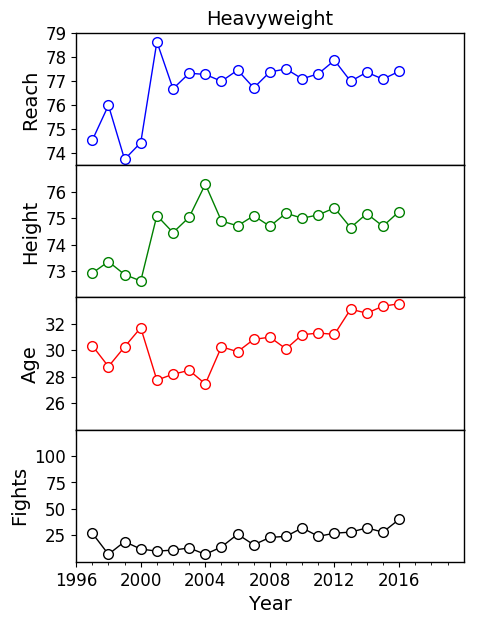

In [94]:
for w in ['Featherweight', 'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']:
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')

     fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 7), sharex='all')
     
     exec('ax4.plot(years, num_fights_'+ w_class +', \'k-\',  marker=\'o\', mec=\'k\', mfc=\'w\',mew=1, ms=7)')
     exec('ax3.plot(years, age_'+ w_class +', \'r-\', marker=\'o\', mec=\'r\', mfc=\'w\', mew=1, ms=7)')
     exec('ax2.plot(years, height_'+ w_class +', \'g-\', marker=\'o\', mec=\'g\', mfc=\'w\', mew=1, ms=7)')
     exec('ax1.plot(years, reach_'+ w_class +', \'b-\', marker=\'o\', mec=\'b\', mfc=\'w\', mew=1, ms=7)')

     ax4.set_ylabel('Fights')
     ax3.set_ylabel('Age')
     ax2.set_ylabel('Height')
     ax1.set_ylabel('Reach')
     ax4.set_xlabel('Year')
     
     if w == 'Featherweight':
          ax1.set_ylim(69, 71)
          major_ticks_ = np.arange(69.5, 72, 0.5)
          ax1.set_yticks(major_ticks_)
          ax1.set_yticklabels(major_ticks_)
          
          ax2.set_ylim(67.5, 69.5)
          major_ticks_ = np.arange(68, 70, 0.5)
          ax2.set_yticks(major_ticks_)
          ax2.set_yticklabels(major_ticks_)

     if w == 'Lightweight':
          ax1.set_ylim(69, 73)
          major_ticks_ = np.arange(70, 74, 1)
          ax1.set_yticks(major_ticks_)
          ax1.set_yticklabels(major_ticks_)
          
          ax2.set_ylim(66, 72)
          major_ticks_ = np.arange(67, 72, 1)
          ax2.set_yticks(major_ticks_)
          ax2.set_yticklabels(major_ticks_)

     if w == 'Welterweight':
          ax1.set_ylim(69, 74)
          major_ticks_ = np.arange(70, 75, 1)
          ax1.set_yticks(major_ticks_)
          ax1.set_yticklabels(major_ticks_)
          
          ax2.set_ylim(68, 73)
          major_ticks_ = np.arange(69, 73, 1)
          ax2.set_yticks(major_ticks_)
          ax2.set_yticklabels(major_ticks_)

     if w == 'Middleweight':
          ax1.set_ylim(73.5, 75.5)
          major_ticks_ = np.arange(74, 76, 0.5)
          ax1.set_yticks(major_ticks_)
          ax1.set_yticklabels(major_ticks_)
          
          ax2.set_ylim(70.5, 73.5)
          major_ticks_ = np.arange(71, 74, 1)
          ax2.set_yticks(major_ticks_)
          ax2.set_yticklabels(major_ticks_)

     if w == 'Light Heavyweight':
          ax1.set_ylim(74, 76.5)
          major_ticks_ = np.arange(74.5, 77, 0.5)
          ax1.set_yticks(major_ticks_)
          ax1.set_yticklabels(major_ticks_)
          
          ax2.set_ylim(72, 74.5)
          major_ticks_ = np.arange(72.5, 74.5, 0.5)
          ax2.set_yticks(major_ticks_)
          ax2.set_yticklabels(major_ticks_)
          
     if w == 'Heavyweight':
          ax1.set_ylim(73.5, 79)
          major_ticks_ = np.arange(74, 80, 1)
          ax1.set_yticks(major_ticks_)
          ax1.set_yticklabels(major_ticks_)
          
          ax2.set_ylim(72, 77)
          major_ticks_ = np.arange(73, 77, 1)
          ax2.set_yticks(major_ticks_)
          ax2.set_yticklabels(major_ticks_)

     fig.subplots_adjust(hspace=0)
     ax1.set_title(w, fontsize=14)
     ax3.set_ylim(24, 34)
     major_ticks_ = np.arange(26, 34, 2)
     ax3.set_yticks(major_ticks_)
     ax3.set_yticklabels(major_ticks_)
     
     ax4.set_xlim(1996, 2020)
     major_ticks = np.arange(1996, 2020, 4)
     ax4.set_xticks(major_ticks)
     minor_ticks = np.arange(1996, 2020, 1)
     ax4.set_xticks(minor_ticks, minor = True)
     ax4.set_ylim(0, 125)
     major_ticks_ = np.arange(25, 125, 25)
     ax4.set_yticks(major_ticks_)
     ax4.set_yticklabels(major_ticks_)
     
     #ax1.margins(0.1)
     #ax2.margins(0.1)
     #ax4.margins(0.1)
     
     plt.savefig('report/age/' + w_class + '_age_height_reach.pdf', bbox_inches='tight')

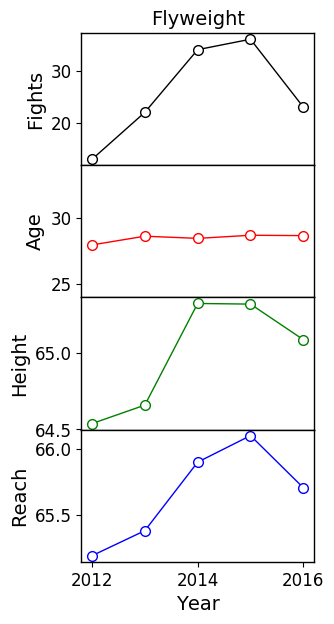

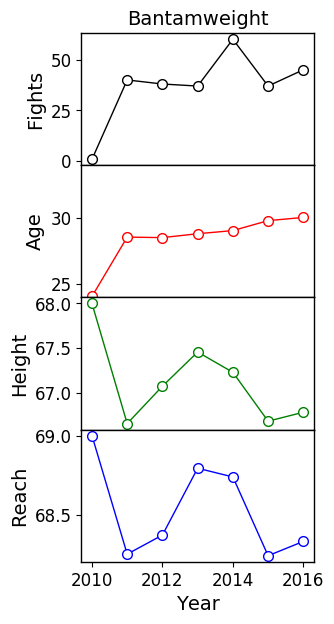

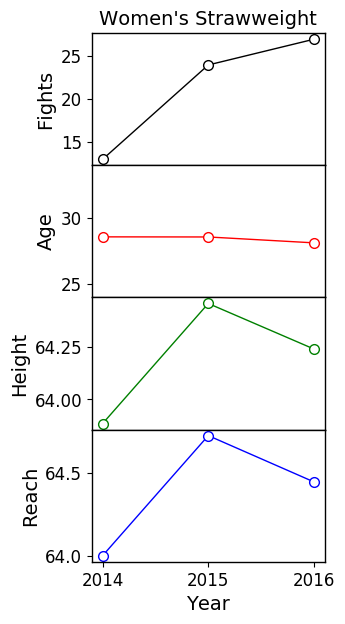

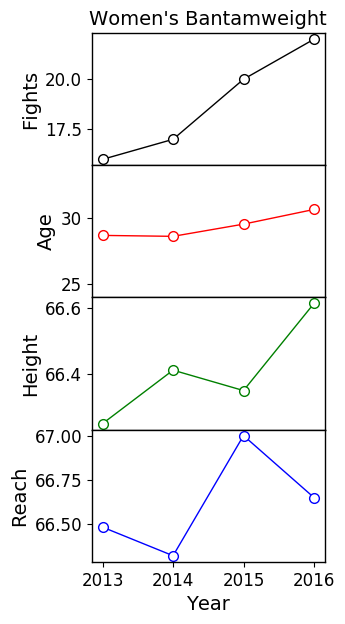

In [95]:
small = ['Flyweight', 'Bantamweight', "Women's Strawweight", "Women's Bantamweight"]
for w in small:
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')

     fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(3, 7), sharex='all')
     
     exec('ax1.plot(years, num_fights_'+ w_class +', \'k-\',  marker=\'o\', mec=\'k\', mfc=\'w\',mew=1, ms=7)')
     exec('ax2.plot(years, age_'+ w_class +', \'r-\', marker=\'o\', mec=\'r\', mfc=\'w\', mew=1, ms=7)')
     exec('ax3.plot(years, height_'+ w_class +', \'g-\', marker=\'o\', mec=\'g\', mfc=\'w\', mew=1, ms=7)')
     exec('ax4.plot(years, reach_'+ w_class +', \'b-\', marker=\'o\', mec=\'b\', mfc=\'w\', mew=1, ms=7)')

     ax2.set_ylim(24, 34)

     ax1.set_ylabel('Fights')
     ax2.set_ylabel('Age')
     ax3.set_ylabel('Height')
     ax4.set_ylabel('Reach')
     ax4.set_xlabel('Year')

     plt.setp(ax1.get_yticklabels()[0], visible=False)
     plt.setp(ax2.get_yticklabels()[0], visible=False)
     plt.setp(ax3.get_yticklabels()[0], visible=False)
     plt.setp(ax4.get_yticklabels()[0], visible=False)

     plt.setp(ax1.get_yticklabels()[-1], visible=False)
     plt.setp(ax2.get_yticklabels()[-1], visible=False)
     plt.setp(ax3.get_yticklabels()[-1], visible=False)
     plt.setp(ax4.get_yticklabels()[-1], visible=False)

     fig.subplots_adjust(hspace=0)
     ax1.set_title(w, fontsize=14)
     #ax4.set_xlim(2010, 2018)
     #major_ticks = np.arange(2010, 2018, 2)
     #ax4.set_xticks(major_ticks)
     #minor_ticks = np.arange(1996, 2020, 1)
     #ax4.set_xticks(minor_ticks, minor = True)
     plt.savefig('report/age/' + w_class + '_age_height_reach.pdf', bbox_inches='tight')

### What is the mean age of active fighters in each weight class?

In [96]:
name_weight = pd.read_csv('data/weight_class_majority.csv', header=0)
name_weight[name_weight.Active == 1].shape[0]

515

While there are 533 active fighters in the UFC data set, the missing 18 fighters are newcomers.

In [97]:
fighters = fighters.merge(name_weight, on='Name', how='right')
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')

In [98]:
age_class = []
for w in wc:
     tmp = fighters[(fighters.WeightClassMajority == w) & (fighters.Active == 1)]
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')
     exec('age_' + w_class + '=tmp.Age.values')
     exec('age_class.append(age_' + w_class + ')')

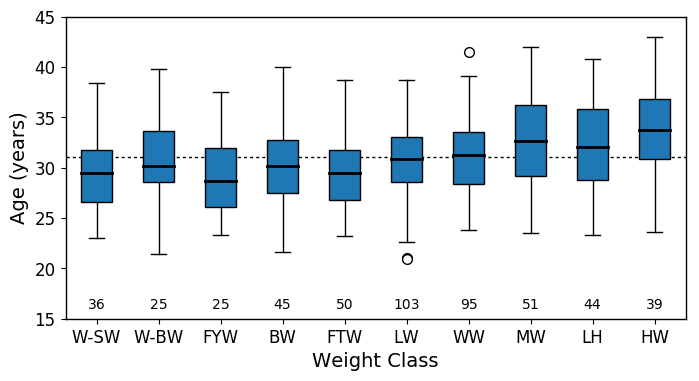

In [99]:
mean_age = fighters[(fighters.Active == 1)].Age.mean()
fig, ax = plt.subplots(figsize=(8, 4))
wlabels = ['W-SW', 'W-BW', 'FYW', 'BW', 'FTW', 'LW', 'WW', 'MW', 'LH', 'HW']
plt.boxplot(age_class, labels=wlabels, patch_artist=True)
plt.plot([-1, 13], [mean_age, mean_age], 'k:', zorder=0)
for i, ages in enumerate(age_class):
     plt.text(i + 1, 16, ages.size, ha='center', fontsize=10)
plt.ylim(15, 45)
plt.xlabel('Weight Class')
plt.ylabel('Age (years)')
plt.savefig('report/age/anova_age_by_weightclass.pdf', bbox_inches='tight')

The Levene test tests the null hypothesis that all input samples are from populations with equal variances:

In [100]:
from scipy.stats import levene, bartlett

W, p_value = levene(*age_class, center='mean')
W, p_value, p_value > 0.05

(1.0858653495988075, 0.37142140525913558, True)

Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene’s test levene is more robust.

In [101]:
W, p_value = bartlett(*age_class)
W, p_value, p_value > 0.05

(7.5818088101992389, 0.57677524737235331, True)

The kurtosistest function tests the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution.

In [102]:
from scipy.stats import kurtosis, skew, kurtosistest

for ac in age_class:
     Z, p_value = kurtosistest(ac)
     print '%.1f\t%.1f\t%.1f\t%.1f\t%.1f' % (ac.mean(), ac.std(), skew(ac), kurtosis(ac), p_value)

29.6	3.8	0.2	-0.6	0.5
30.6	4.2	-0.2	-0.1	0.7
28.8	3.6	0.3	-0.5	0.8
30.6	4.2	0.3	-0.5	0.6
29.4	3.3	0.4	-0.1	0.9
30.9	3.7	-0.2	0.3	0.4
31.1	3.8	0.2	-0.5	0.3
32.9	4.3	0.2	-0.8	0.2
32.1	4.4	0.0	-1.0	0.0
33.6	4.3	-0.1	-0.5	0.7


The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [103]:
from scipy.stats import f_oneway

F_statistic, p_value = f_oneway(*age_class)
F_statistic, p_value, p_value > 0.05

(5.8274173490038406, 9.7405428795643731e-08, False)

### Average reach for ranked versus unranked by weight class

In [104]:
with open('data/ranked_ufc_fighters_1488838405.txt') as f:
     ranked = f.readlines()
ranked = [fighter.strip() for fighter in ranked]

In [105]:
wc = ['Flyweight', 'Bantamweight', 'Featherweight','Lightweight', 'Welterweight', 'Middleweight',
      'Light Heavyweight', 'Heavyweight', "Women's Strawweight", "Women's Bantamweight"]
for i, w in enumerate(wc):
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')
     exec('ranked_' + w_class + '=[]')
     for j in range(16):
          exec('ranked_' + w_class + '.append(ranked[i * 16 + j])')

In [106]:
for w in wc:
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')
     exec('x=fighters[fighters.Name.isin(ranked_' + w_class + ')].Reach.mean()')
     exec("y=fighters[(fighters.WeightClassMajority ==\""  + w + "\") & (fighters.Active == 1) & (~fighters.Name.isin(ranked_" + w_class + "))].Reach.mean()")
     print w_class, x, y, x > y

flyweight 65.6666666667 66.1111111111 False
bantamweight 68.0 68.90625 False
featherweight 70.25 70.1842105263 True
lightweight 72.3125 71.4269662921 True
welterweight 74.0 73.4390243902 True
middleweight 75.375 75.4054054054 False
light_heavyweight 76.4375 75.2857142857 True
heavyweight 78.375 76.7826086957 True
w_strawweight 64.0 64.6666666667 False
w_bantamweight 67.4375 66.5 True
